<a href="https://colab.research.google.com/github/VanessaRivas2000/Tareas-Progra-III/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [10]:
import tensorflow_datasets as tfds

In [13]:
datos,  metadatos = tfds.load("fashion_mnist", as_supervised = True, with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete3N89DO/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete3N89DO/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [14]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='~/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

In [15]:
datos_entrenamiento, datos_prueba = datos["train"], datos["test"]

In [17]:
nombres_clases = metadatos.features["label"].names

In [18]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Normalizar los datos (pasar de 0-255 a 0-1)

In [19]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

  

In [22]:
datos_entrenamiento = datos_entrenamiento. map(normalizar)

datos_prueba = datos_prueba.map(normalizar)

In [23]:
datos_entrenamiento = datos_entrenamiento.cache()
datos_prueba = datos_prueba.cache()

In [ ]:
# Mostrar una imagen d elos datos de prueba

In [24]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))



In [ ]:
# Dibujar

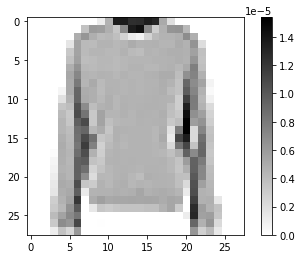

In [27]:
plt.figure()
plt.imshow(imagen, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

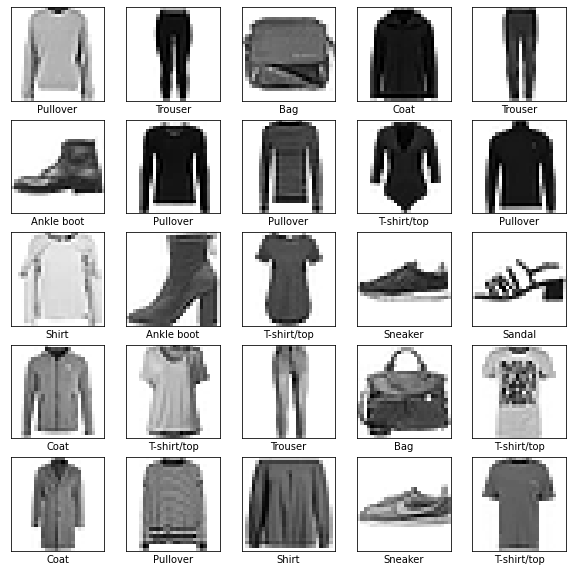

In [30]:
plt.figure(figsize = (10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow (imagen, cmap = plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [33]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(50, activation = tf.nn.relu),
    tf.keras.layers.Dense(50, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax),
])

In [ ]:
# Compilar el modelo

In [35]:
modelo.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]  

)

In [36]:
num_entrenamiento = metadatos.splits ["train"]. num_examples
num_prueba = metadatos.splits ["test"]. num_examples

In [37]:
print(num_entrenamiento)
print(num_prueba)

60000
10000


In [38]:
tamaño_lote = 32

datos_entrenamiento = datos_entrenamiento.repeat(). shuffle(num_entrenamiento). batch(tamaño_lote)
datos_prueba = datos_prueba. batch(tamaño_lote)

In [39]:
import math

In [ ]:
# Entrenar

In [41]:
historial = modelo.fit (datos_entrenamiento, epochs = 5, steps_per_epoch = math.ceil(num_entrenamiento/tamaño_lote))

Epoch 1/5
1875/1875 [==============================] - 13s 2ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0998
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1010
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0989


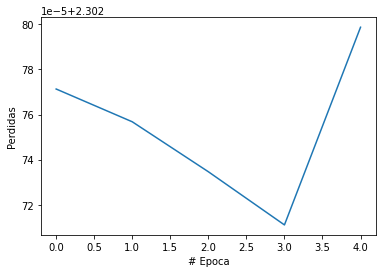

In [42]:
plt.xlabel ("# Epoca")
plt.ylabel ("Perdidas")
plt.plot (historial.history ["loss"])

In [43]:
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict (imagenes_prueba)

In [44]:
def garficar_imagen (i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow (img[..., 0], cmap = plt.cm.binary)

In [47]:
etiqueta_prediccion = np.argmax(arr_predicciones)
if etiqueta_prediccion == etiqueta_real:
  color = "Green"
else:
  color ="read"

  plt.xlabel("{} {:2.0f} % ({})". format(
      nombres_clases[etiqueta_prediccion],
      100 * np.max(arr_predicciones),
      nombres_clases[etiqueta_real],
      color = color
  ))

NameError: ignored